In [7]:
# Create a twitter connection using TwitterAPI:
# https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import configparser
from TwitterAPI import TwitterAPI
def get_twitter(config_file):
    """Read the config_file and construct an instance of TwitterAPI.
    Args:
        config_file ... A config file in configParser format with Twitter credentials
        Returns:
            An instance of TwitterAPI."""
    config = configparser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
        config.get('twitter','consumer_key'),
        config.get('twitter','consumer_secret'),
        config.get('twitter','access_token'),
        config.get('twitter','access_token_secret'),
    )
    return twitter
twitter = get_twitter('twitter.cfg')
print('Established Twitter connection.')

Established Twitter connection.


In [9]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [10]:
# What can we do with this twitter object?
# builtin method `dir` tells us..
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [11]:
# Get help on the `request` method using the builtin method called... `help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [13]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'})

In [14]:
# What object is returned?
# builtin type method will tell us.
print(type(request))
dir(request)

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'close',
 'get_iterator',
 'get_rest_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [15]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [16]:
for i in [1,2,3]:
    print(i)

1
2
3


In [17]:
print([i*2 for i in [1,2,3]])

[2, 4, 6]


In [19]:
# The _iter_ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See
# https://docs.python.org/2/tutorial/datastructures.html

In [20]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [21]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [22]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

In [23]:
# Print keys.
a_tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [24]:
# The test.
print(a_tweet['text'])
print(a_tweet['created_at'])

@steveGOgreen @AngelaWoody @CynGagen #Hummus &amp; #Lamb #Ragu @ema_restaurant #Chicago is a fav https://t.co/ZLvXciWKRj https://t.co/LK3so5zD1y
Sat Sep 02 23:54:07 +0000 2017


In [25]:
# What is a user?...another dict
a_tweet['user']

{'contributors_enabled': False,
 'created_at': 'Sat Apr 21 15:15:24 +0000 2012',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Author, Learning Specialist and Creator of Award Winning Recipes',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'gloriagoodtaste.com',
     'expanded_url': 'http://www.gloriagoodtaste.com/',
     'indices': [0, 22],
     'url': 'http://t.co/YT8v2jFjyN'}]}},
 'favourites_count': 18615,
 'follow_request_sent': False,
 'followers_count': 3008,
 'following': False,
 'friends_count': 1208,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 559632622,
 'id_str': '559632622',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 180,
 'location': '',
 'name': 'Gloria Piantek',
 'notifications': False,
 'profile_background_color': '0099B9',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme4/bg.gif',
 'profile_background_image_url_http

In [26]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=GGoodtaste, name=Gloria Piantek, location=


In [29]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count': 200})
followers = [r for r in request]

print('found %d followers for %s' % (len(followers), screen_name))
# See more about paging here: https://dev.twitter.com/docs/working-with-timeline

found 200 followers for GGoodtaste


In [30]:
type(followers[0])

dict

In [31]:
followers[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'live_following', 'follow_request_sent', 'notifications', 'muting', 'blocking', 'blocked_by', 'translator_type'])

In [33]:
followers[0]['screen_name']

'JeremaihProphet'

In [34]:
# What happens if we het an error
request = twitter.request('followers/list',
                         {'screen_name': 'this_is_not_a_valid_screen_name',
                         'count':200})

In [35]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [36]:
request.status_code

404

In [ ]:
#### Limitations
# Can only search 2 weeks in past but can get upto 3200 most recent tweets of a user
# Rate limits! e.g 180 request in 15 minute window.
# https://dev.twitter.com/docs/rate-limiting/1.1/limits


In [37]:
# Working around rate limits.
def robust_request(twitter, resources, params, max_tries=5):
    """If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
        twitter ..... A TwitterAPI object.
        resources ... A reqource string to request.
        params ...... A parameter dictionary for the request.
        max_tries ... The maximum number of triws to attempt.
    Return:
        A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' % requesy.text)
            time.sleep(61*15)

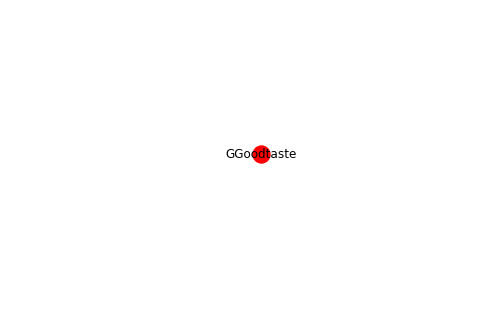

In [44]:
# Drawing graphs with NetworkX
import warnings
warnings.filterwarnings("ignore")
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [43]:
# Didn't draw anything? Need to place it inline
import matplotlib.pyplot as plt
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

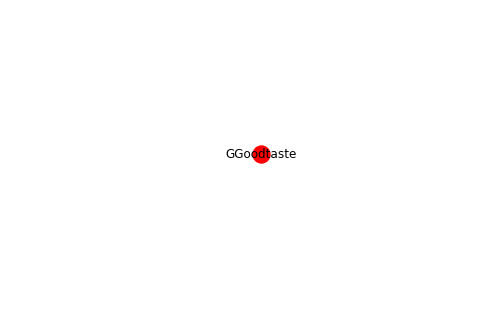

In [45]:
nx.draw(graph, with_labels=True)

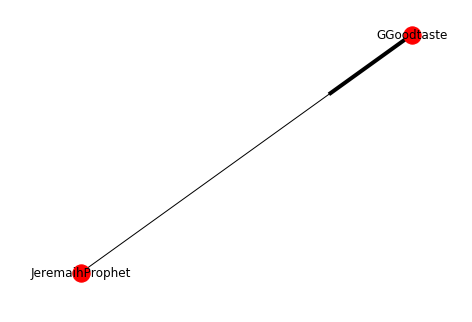

In [46]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

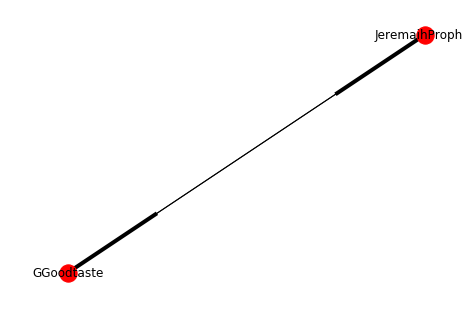

In [47]:
# Make link symmetric
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [48]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 200 tweets for user GGoodtaste


In [49]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

@steveGOgreen @AngelaWoody @CynGagen #Hummus &amp; #Lamb #Ragu @ema_restaurant #Chicago is a fav https://t.co/ZLvXciWKRj https://t.co/LK3so5zD1y
Hear the #Chef 's secrets to success with @BigCeej of @ema_restaurant during #Food for #Body Mind &amp; Spirit… https://t.co/U0QNWB2CZL
RT @asaladlover: Roasted Pear salad - yum https://t.co/gQPyo8bGEt
RT @tundrabear63: @ILLUMlNATI But small amounts of either are good for you
RT @ILLUMlNATI: Sugar and salt look the same, so be careful who you trust.
@K_Fuel @KelloggsUS #BlessedAndGrateful this #FridayMotivation How about you?https://t.co/CJ4Kw8TQjj https://t.co/FtjHG8MH0H
@FrenchGardenUK @GatherersUk 'Tis the season of veg delight https://t.co/CJ4Kw8CfrL https://t.co/0i4ArntmdV
#Chicago in its many splendored beauty as #September is here RT @barrybutler9 📷 https://t.co/lsAm0THI5N
@nineov @asaladlover Forest Roasted #pear w brown butter squash https://t.co/CJ4Kw8CfrL #FoodieFriday #Foodie… https://t.co/ZyBAaCuDHH
@LauraTortella @DLC618 @archite

In [51]:
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.

In [52]:
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,2,1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [55]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespaces
print('founf %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

founf 1106 unique terms in 200 tweets


[('a', 54),
 ('the', 49),
 ('rt', 47),
 ('to', 45),
 ('#foodtravelchat', 42),
 ('#sundaysupper', 42),
 ('@familyfoodie', 38),
 ('#foodiechats', 32),
 ('@foodtravelist', 31),
 ('is', 29)]

In [56]:
list(counts.keys())[0]

'@stevegogreen'

In [57]:
sorted([5,4,-10,-1], key=lambda x: -x)

[5, 4, -1, -10]

In [61]:
sorted([('joe', 10), ('mary', 20), ('jim',15), ('joe', 5)],
      key=lambda x: -x[1])

[('mary', 20), ('jim', 15), ('joe', 10), ('joe', 5)]

In [64]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print('\n'.join('%s=%d' % (item[0], item[1])
               for item in sorted_counts))

a=54
the=49
rt=47
to=45
#foodtravelchat=42
#sundaysupper=42
@familyfoodie=38
#foodiechats=32
@foodtravelist=31
is=29
and=29
for=27
@foodiechats=26
i=23
with=22
of=18
in=17
your=16
@ant_kneee=15
my=15
-=14
@ggoodtaste=14
you=13
@s_poet82=13
on=12
@angelawoody=11
love=11
a4=11
like=11
@laseafoodboard=11
@stevegogreen=10
are=10
a7=10
how=9
about=9
@foodtravelchat=9
a1=9
it=9
go=9
this=8
a10=8
a8=8
a6=8
a2=8
make=8
we=8
https://t.co/cj4kw8cfrl=7
w=7
a9=7
great=7
at=7
@visitwales=7
that=7
an=7
from=7
#domesticseafood=7
@dlaskaris=6
evening=6
hi=6
some=6
@lorisica=6
recipe=6
@sundaysupperfam=6
@familyfoodie:=6
chat=6
@ilfarmfamilies=6
&amp;=5
#chicago=5
https://t.co/zlvxciwkrj=5
so=5
as=5
all!=5
here's=5
#tasteofwales=5
would=5
a3=5
veggies=5
gloria!=5
join=5
time=5
@always5star=5
or=5
#incrediblebecause=5
@thatskinnychick=5
do=5
@eatalychicago=5
@ema_restaurant=4
look=4
@leadtoday=4
@shreddel=4
#icecream=4
have=4
place=4
best=4
food=4
beautiful=4
menu=4
@rkadventures=4
@joebugbuster=4
#nost

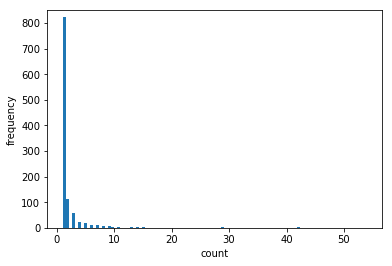

In [70]:
# Plot these counts
import matplotlib.pyplot as plt
plt.hist(list(counts.values()), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,850))
plt.show()

<b>Zipf's law</b>: (roughly) there are many rare words; there are a small number of extremely frequent words.

Alternatively:
The frequency of a term is inversely proportional to its rank.

Let $f_{i}$ be the frequency of the $i^{th}$ most common term.

$f_{i}\propto\frac{1}{i}$

equivalently
$f_{i} = k*i^b$ for constant $k$ and $b = -1$

In [71]:
freqs = sorted(counts.values(), reverse=True)
freqs[:10]

[54, 49, 47, 45, 42, 42, 38, 32, 31, 29]

In [72]:
ranks = list(range(1, len(freqs)+1))

In [73]:
# Minimize mean squared error to find the best value of k
from scipy.optimize import curve_fit
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

In [74]:
# Define the zipf function and fit the k parameter.
def zipfs(i, k):
    return k/i
zipf_parms,covar = curve_fit(zipfs, ranks, freqs)
print('Zipf fit is %.2f*T^-1' % zipf_parms[0])

Zipf fit is 102.20*T^-1


In [75]:
zipf_parms

array([ 102.19698943])

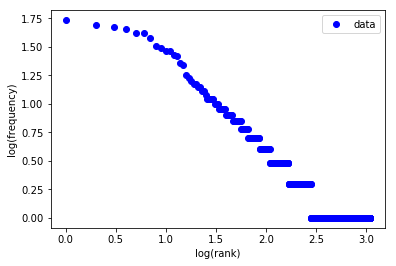

In [82]:
# Try a log-log plot.
import numpy as np
l_ranks = np.log10(ranks)
l_freqs = np.log10(freqs)
plt.plot(l_ranks, l_freqs, 'ob', label='data')
plt.legend(loc='best')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')

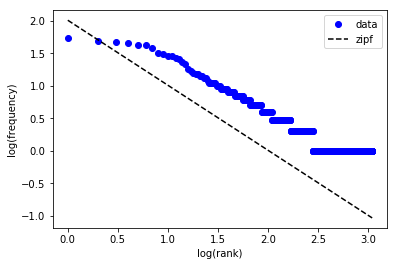

In [84]:
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(l_ranks, np.log10(zipfs(ranks, *zipf_parms)), 'k--', label='zipf')  # k-- = black dashed line
plt.legend(loc='best')
